### 오후 2)

## 로지스틱회귀(LogisticRegression)
- 인공신경망의 기본 개념과 동일
- Regression이지만 다중'분류'로 사용
- 선형모델 기반으로 y=Wx+b 그대로 사용
- y=Wx+b의 결과를 분류로 변환하기 위해 함수를 사용 => softmax()

### 성적 - 합격/불합격 분류 실습

In [21]:
# 사용 모듈 로딩
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### [1] 데이터 준비

In [22]:
X = [89, 95, 100, 78, 85, 70, 55, 67]        # 점수
y = ['B', 'A', 'A', 'B', 'B', 'C', 'C', 'C'] # 등급 (A, B, C)

In [23]:
# 데이터가 많지 않으니 학습에 사용할 수 있도록 형변환까지 해버리자
arrX = np.array(X).reshape(-1,1)
arrY = np.array(y)

In [24]:
# 데이터 체크
print('arrX : ', arrX.shape, "\n"'arrY : ', arrY.shape)

arrX :  (8, 1) 
arrY :  (8,)


### [2] 데이터 확인

In [25]:
# #78 넘파이에서 시그모이드 함수를 처리해주는 것, scipy로도

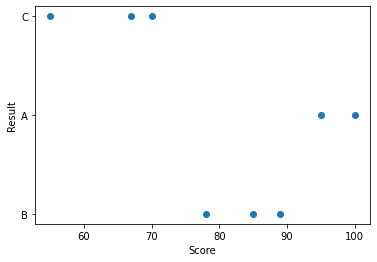

In [26]:
# 현재 데이터 시각화
plt.scatter(X,y)
plt.xlabel('Score')
plt.ylabel('Result')
plt.show()

### [3] 모델 생성 & 학습

In [27]:
# #82-83 (API에 있는 해당 클래스의 파라미터)
# 머신러닝이나 딥러닝에서 과대적합 해결하는게 가장 문제가 될 것임
# - 규제(=>penalty 파라미터)
# - [ C =1.0 ]으로 잡혀있는 이 값(규제강도)을 조절하며 '튜닝'할 것임
# - max_iter (계산 작업 수, 기본이 100, 경고 메시지가 뜨면 조절)
# - predict(X) => 확률값에 대한 결과(라벨)를 반환
# - predict_proba(X) => 100%는 아니더라도 학습한 것으로 해보고 나오는 확률값을 반환

In [28]:
# 모델 생성
model = LogisticRegression()

In [29]:
# 모델 학습
model.fit(arrX, arrY)

LogisticRegression()

In [30]:
# 학습 후, 설정된 속성(Attributes)
print("분류 종류 : ", model.classes_)
print("가중치 값 : ", model.coef_)
print("절편 값 : ", model.intercept_)
print("특성 갯수 : ", model.n_features_in_)

분류 종류 :  ['A' 'B' 'C']
가중치 값 :  [[ 0.69223254]
 [-0.02709865]
 [-0.66513389]]
절편 값 :  [-59.89233063   6.30319355  53.58913709]
특성 갯수 :  1


### [4] 모델 평가

In [31]:
# 학습용/테스터용 데이터 점수 비교해서 -> 과소/과대적합 체크
# => 학습의 횟수 / 규제 조절

In [32]:
model.score(arrX, arrY)

1.0

### [5] 테스트

In [33]:
# predict() : 새로운 데이터로 진행

In [34]:
preY = model.predict(arrX)
preY

array(['B', 'A', 'A', 'B', 'B', 'C', 'C', 'C'], dtype='<U1')

In [35]:
# 1개 데이터
preY = model.predict([arrX[0]])
preY

array(['B'], dtype='<U1')

In [40]:
preY = model.predict([[87]])
print('예측결과 : ', preY)

probaY = model.predict_proba([[87]])
print("분류 종류 : ", model.classes_)
print('예측확률 : ', probaY)

예측결과 :  ['B']
분류 종류 :  ['A' 'B' 'C']
예측확률 :  [[2.62374692e-02 9.73501267e-01 2.61264222e-04]]


In [41]:
# 결정함수 (아래 계산을 해서 띄워줌, 아직 시그모이드나 소프트맥스 안 거친것)
ret = model.decision_function([[87]])
ret
# print(np.round(ret,3))

array([[ 0.33190041,  3.94561102, -4.27751114]])

In [42]:
# y=ax+b라고 한다면 : 모델 파라미터
# - y로 나온 것을 소프트맥스 씌워서 나온 것 (위와 같음)
result = (model.coef_*87)+model.intercept_
result
# print('result : ', np.round(result,3))

array([[   0.33190041,   66.52742459,  113.81336813],
       [ -62.24991316,    3.94561102,   51.23155456],
       [-117.75897886,  -51.56345468,   -4.27751114]])

In [39]:
# 시그모이드 함수 expit(ax+b) / 소프트맥스 함수 softmax(ax+b) 후 결과 확인
# 결정함수의 proba와 같은 값이 나올 것임
from scipy.special import softmax, expit
sigValue2 = softmax(ret)
print(np.round(sigValue2, 5))

[[2.624e-02 9.735e-01 2.600e-04]]
